Question 1: What is Detectron2 and how does it differ from previous object detection frameworks?

->Detectron2 is an open-source object detection framework developed by Facebook AI Research (FAIR) and built on PyTorch. It supports tasks like object detection, segmentation, and keypoint detection.

Compared to older frameworks, Detectron2 is faster, more flexible, and easier to customize. It uses PyTorch’s dynamic computation graph, offers a modular design, and provides pre-trained state-of-the-art models, making development and experimentation simpler.

Question 2: Explain the process and importance of data annotation when working with Detectron2.

->Data annotation is the process of labeling objects in images by drawing bounding boxes, masks, or keypoints and assigning class labels. When working with Detectron2, annotations are usually prepared in COCO format, which the framework uses for training and evaluation.

The importance of data annotation lies in the fact that Detectron2 learns by comparing its predictions with these labeled ground-truth annotations. Accurate and consistent annotations help the model learn correct object locations and classes, leading to better detection accuracy and performance. Poor annotation quality can result in incorrect or weak model predictions.

Question 3: Describe the steps involved in training a custom object detection model using Detectron2.

->To train a custom object detection model using Detectron2, first the dataset is annotated and converted into COCO format. Next, the dataset is registered in Detectron2 and a pre-trained model is selected from the model zoo. Then, the training configuration such as learning rate, batch size, and number of classes is set. After that, the model is trained using the training script, and finally the trained model is evaluated and tested on new images.

Question 4: What are evaluation curves in Detectron2, and how are metrics like mAP and IoU interpreted?

->Evaluation curves in Detectron2 are graphical tools used to analyze a model’s detection performance, such as precision–recall curves. These curves show how well the model balances correct detections and false detections at different confidence thresholds.

mAP (mean Average Precision) measures the overall detection accuracy across all object classes and IoU thresholds; higher mAP indicates better model performance. IoU (Intersection over Union) measures the overlap between the predicted bounding box and the ground-truth box. A higher IoU value means the object is localized more accurately.

Question 5: Compare Detectron2 and TFOD2 in terms of features, performance, and
ease of use.

->Detectron2 and TFOD2 (TensorFlow Object Detection API 2) are popular frameworks for object detection. Detectron2 is built on PyTorch and is known for its high performance, clean modular design, and strong support for research and customization. It provides many state-of-the-art models with fast training and inference.

TFOD2 is built on TensorFlow and focuses more on production deployment, offering easy integration with TensorFlow tools like TensorFlow Serving and TFLite. While TFOD2 is powerful, it is often considered more complex to set up and configure compared to Detectron2.

Overall, Detectron2 is preferred for research and experimentation, while TFOD2 is commonly used for TensorFlow-based production environments.



In [5]:
'''Question 6: Write Python code to install Detectron2 and verify the installation.'''


!pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Verify installation
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()
print("Detectron2 installed successfully")




  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-wauowv99
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-wauowv99
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 14.6 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6706472 sha25

In [6]:
'''Question 7: Annotate a dataset using any tool of your choice and convert the
annotations to COCO format for Detectron2.
'''

import json
import os



images = []
annotations = []
categories = [{"id": 1, "name": "object"}]

image_id = 1
annotation_id = 1


image_files = ["image1.jpg", "image2.jpg"]

for img in image_files:
    images.append({
        "id": image_id,
        "file_name": img,
        "width": 640,
        "height": 480
    })


    bbox = [100, 120, 200, 150]

    annotations.append({
        "id": annotation_id,
        "image_id": image_id,
        "category_id": 1,
        "bbox": bbox,
        "area": bbox[2] * bbox[3],
        "iscrowd": 0
    })

    image_id += 1
    annotation_id += 1

coco_format = {
    "images": images,
    "annotations": annotations,
    "categories": categories
}


with open("annotations.json", "w") as f:
    json.dump(coco_format, f, indent=4)

print("Annotations converted to COCO format successfully")


Annotations converted to COCO format successfully


In [8]:
''''Question 8: Write a script to download pretrained weights and configure paths for
training in Detectron2.
'''

from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()

cfg.merge_from_file(
    model_zoo.get_config_file(
        "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
    )
)


cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)


cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)


cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000


cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

print("Pretrained weights loaded and training configuration set successfully")


Pretrained weights loaded and training configuration set successfully


In [3]:
'''Question 8: Write a script to download pretrained weights and configure paths for
training in Detectron2.
'''

!pip install 'git+https://github.com/facebookresearch/detectron2.git'


import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
print("Detectron2 installed successfully")

from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

print("Pretrained weights downloaded and training paths configured successfully")


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-yx4pvngh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-yx4pvngh
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 26.5 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=7084997 sha2

[01/23 05:23:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
W0123 05:23:05.979000 383 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


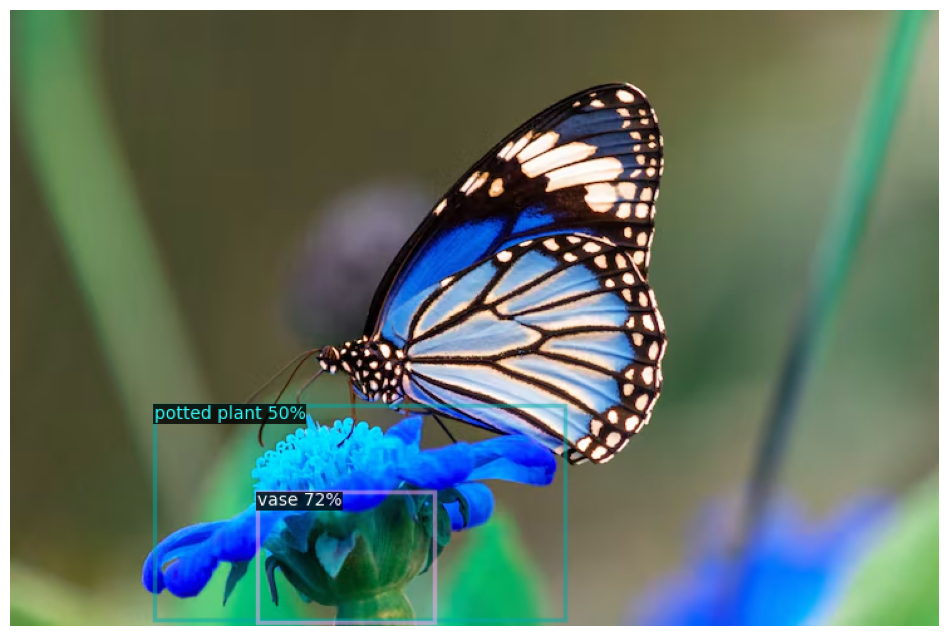

In [7]:
'''Question 9: Show the steps and code to run inference using a trained Detectron2
model on a new image'''

import cv2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cpu"


predictor = DefaultPredictor(cfg)


image_path = "test_image.jpg"
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found! Check the path: {image_path}")


outputs = predictor(image)

v = Visualizer(image[:, :, ::-1], metadata=MetadataCatalog.get("coco_2017_train"))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


plt.figure(figsize=(12, 8))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()


In [10]:
'''Question 10: You are assigned to build a wildlife monitoring system to detect and track
different animal species in a forest using Detectron2. Describe the end-to-end pipeline
from data collection to deploying the model, and how you would handle challenges like
occlusion or nighttime detection.'''

''' ->End-to-End Pipeline for Wildlife Monitoring using Detectron2

Data Collection

Deploy cameras or drones in the forest to capture images and videos of animals.

Collect data under various conditions: day, night, different weather, occlusions, and multiple species.

Data Annotation

Annotate images with bounding boxes, masks, or keypoints for each animal species.

Convert annotations into COCO format, which Detectron2 supports.

Data Preprocessing & Augmentation

Resize images, normalize pixel values.

Apply augmentations like brightness adjustment, flips, rotations, and noise to simulate nighttime or partially occluded animals.

Model Selection & Training

Choose a state-of-the-art Detectron2 model (e.g., Faster R-CNN, Mask R-CNN, or RetinaNet).

Load pretrained COCO weights for transfer learning.

Configure dataset paths, learning rate, batch size, and number of classes.

Train the model using GPU acceleration if available.

Evaluation & Fine-Tuning

Evaluate on a validation set using mAP and IoU.

Fine-tune on difficult cases like occluded animals or nighttime images.

Optionally, use infrared or thermal images for low-light conditions.

Inference & Tracking

Run inference on new video streams or images.

For tracking, integrate object tracking algorithms (e.g., DeepSORT) to maintain identity across frames.

Deployment

Deploy the model on edge devices (like NVIDIA Jetson) or cloud servers.

Set up real-time alerts for specific species or unusual activity.

Handling Challenges

Occlusion: Use data augmentation, multi-frame tracking, or mask-based models (Mask R-CNN).

Nighttime detection: Include infrared/thermal images, brightness augmentation, or train a separate model for low-light conditions.

Class imbalance: Use techniques like oversampling rare species or focal loss.'''




' ->End-to-End Pipeline for Wildlife Monitoring using Detectron2\n\nData Collection\n\nDeploy cameras or drones in the forest to capture images and videos of animals.\n\nCollect data under various conditions: day, night, different weather, occlusions, and multiple species.\n\nData Annotation\n\nAnnotate images with bounding boxes, masks, or keypoints for each animal species.\n\nConvert annotations into COCO format, which Detectron2 supports.\n\nData Preprocessing & Augmentation\n\nResize images, normalize pixel values.\n\nApply augmentations like brightness adjustment, flips, rotations, and noise to simulate nighttime or partially occluded animals.\n\nModel Selection & Training\n\nChoose a state-of-the-art Detectron2 model (e.g., Faster R-CNN, Mask R-CNN, or RetinaNet).\n\nLoad pretrained COCO weights for transfer learning.\n\nConfigure dataset paths, learning rate, batch size, and number of classes.\n\nTrain the model using GPU acceleration if available.\n\nEvaluation & Fine-Tuning\n\